# Trabajo Semanal N°6 : 'Respusta en frencuencia en filtros pasivos RLC'
### Alumno: Magdalena Guida

### APS - 2do cuatrimestre 2025

A partir del circuito propuesto, se desarrolla la funcion transferencia $T(s) = \frac{V_{2}}{V_{1}}$ general, la cual adopta una forma bicuadratica. Se le aplica a tres casos particulares para determinar sus polos y ceros, resolviendo las raices del denominador y nominador, y se representan graficamente sobre el plano complejo (parte real vs parte imaginaria). Luego, se calcula la respuesta en frecuencia, tanto en modulo como en fase, lo que permite caracterizar el comportamiento del sistema y clasificar el tipo de filtro correspondiente a cada configuracion.

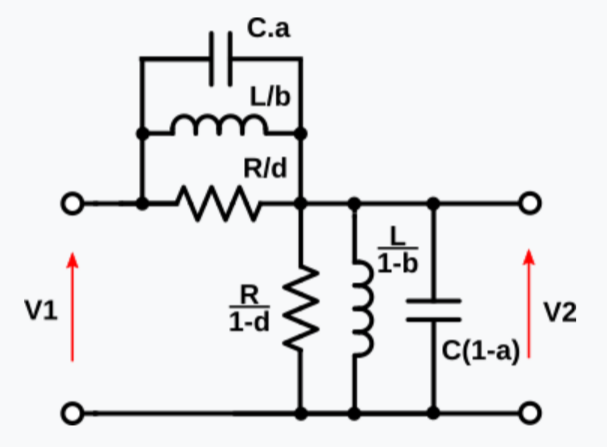

In [2]:
from IPython.display import Image, display 
display(Image(filename='C:/Users/magui/APS/TS SEGUNDAAAA/TS 6/circuito.png'))

El calculo de la funcion de transferencia se realizo e primer lugar  determinando las admitancias equivalentes  de los elementos que estan el paralelo. A partir del circuito simplificado, que adopta la forma de un divisor de tensiones, se aplica la ecuacion correspondiente para calcular la funcion transferencia desde $\frac{V_2}{V_1}$. Luego, la funcion se reescribio en el formato estandar de una ecuacion bicuadratica, lo que permitio identificar los parametros caracteristicos delsistema. Finalmente, se definieron los valores de $\frac{W_{0z}}{Q_z}, W_{0z}^{2}, \frac{W_{0p}}{Q_p}W_{0p}^{2}$ y la ganancia $k$.

[📄 Ver teoría.pdf](teoria.pdf)

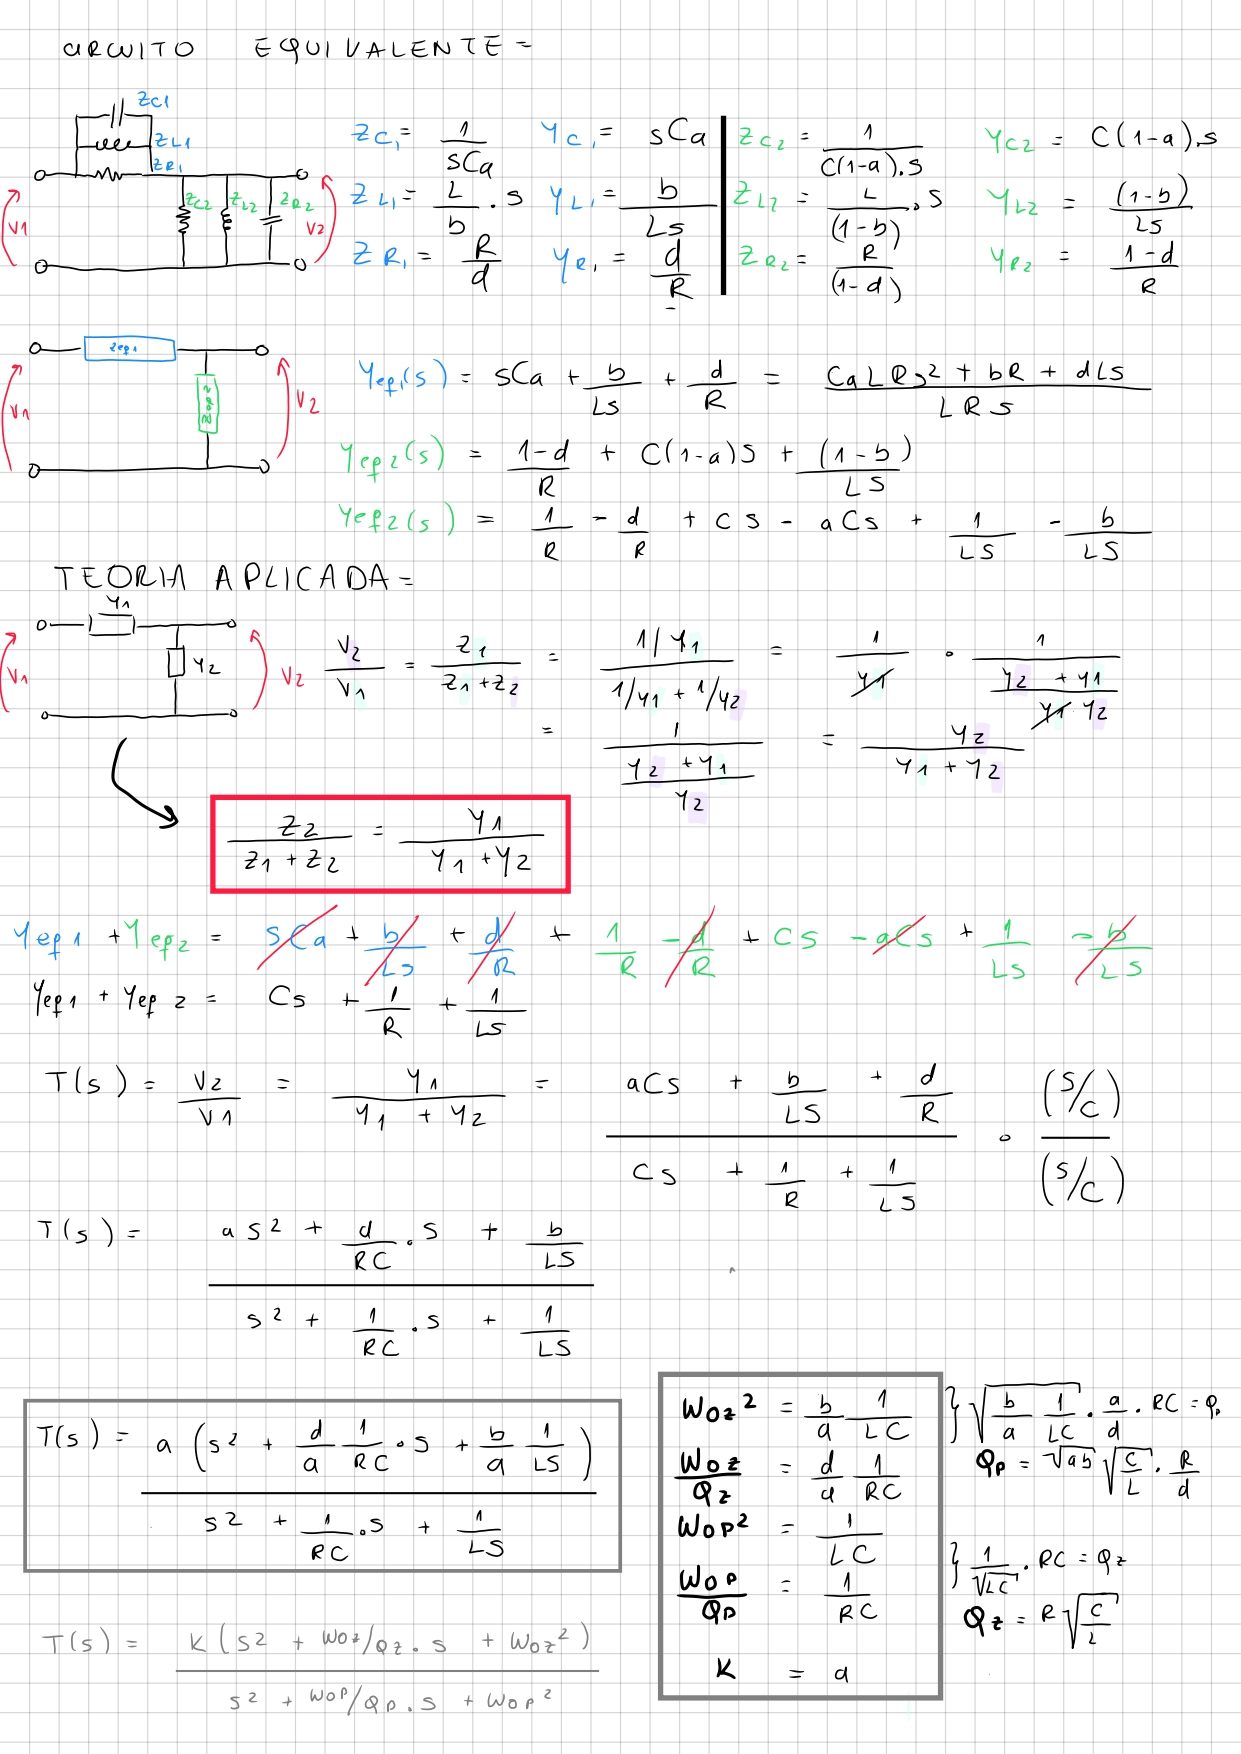

In [20]:
from IPython.display import Image, display 
display(Image(filename='C:/Users/magui/APS/TS SEGUNDAAAA/TS 6/teoria.jpg'))

A continuacion, se analizan tres funciones: $H_1(s), H_2(s)$ y $H_3(s)$, adaptadas al formato bicuadratico para identificar sus parametros caracteristicos: frecuencia y factor de calidad. Se determinana analiticamente sus polos y ceros y se implementa un codigo que permite calcularlos y graficarlos. Para cada funcion, se obtiene y grafica su respuesta de Modulo y respuesta de Fase, y se realiza un analisis para clasificar el tipo de filtro que representa cada una.

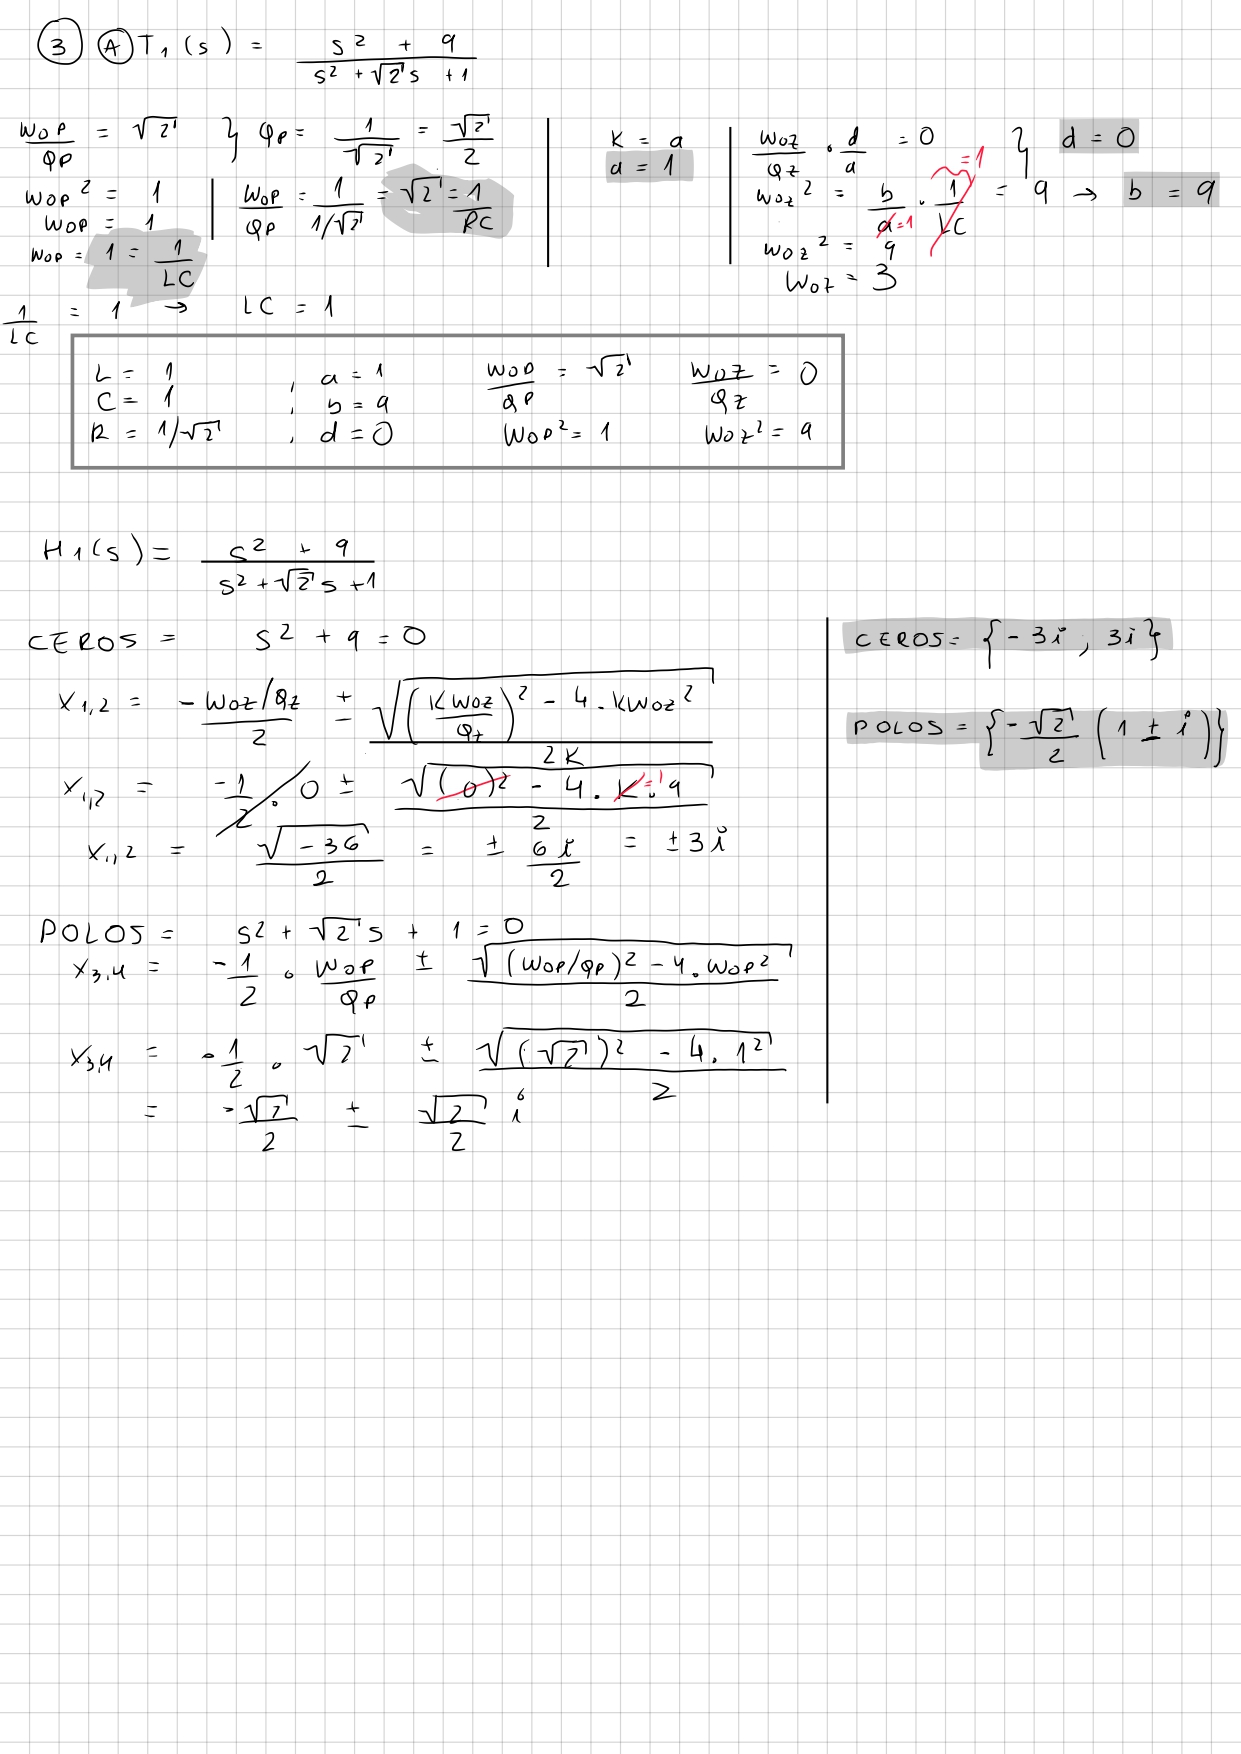

In [22]:
from IPython.display import Image, display 
display(Image(filename='C:/Users/magui/APS/TS SEGUNDAAAA/TS 6/H1(s).jpg'))

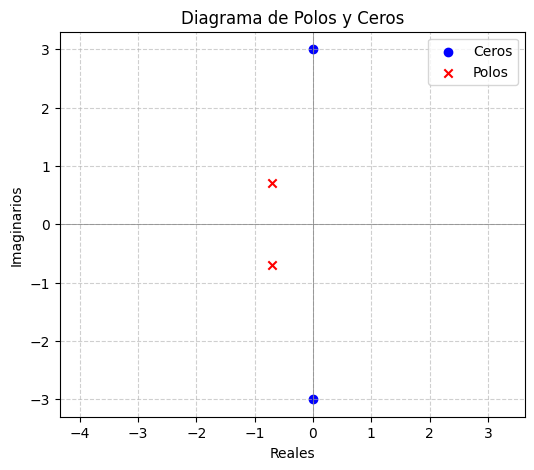

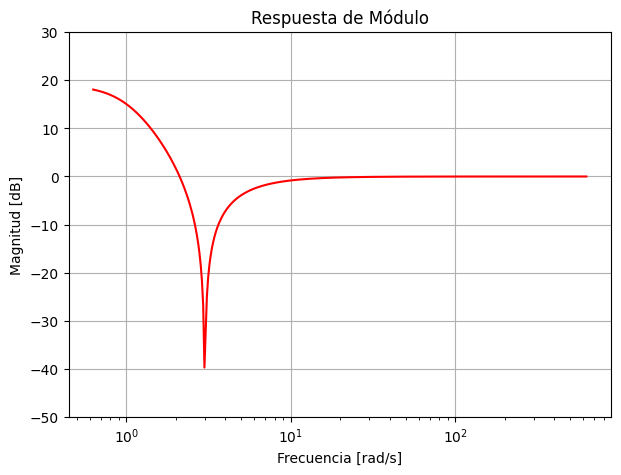

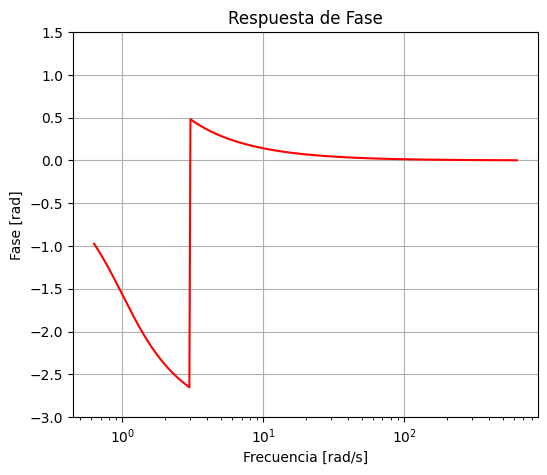

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Definir la función de transferencia H(s) = V2 / V1
zdiv = 0 
pdiv=np.sqrt(2)
W0zcuad =9
W0pcuad =1 
numerador = [1, zdiv, W0zcuad]  # Numerador 
denominador = [1, pdiv, W0pcuad]  # Denominador 

# función transferencia
sistema = signal.TransferFunction(numerador, denominador)

#%% Calculo CEROS Y POLOS
zeros, poles = sistema.zeros, sistema.poles

# Grafico CEROS Y POLOS
plt.figure(figsize=(6, 5))
plt.scatter(np.real(zeros), np.imag(zeros), marker='o', color='blue', label='Ceros')
plt.scatter(np.real(poles), np.imag(poles), marker='x', color='red', label='Polos')
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel('Reales')
plt.ylabel('Imaginarios')
plt.title('Diagrama de Polos y Ceros')
plt.legend()
plt.axis('equal')
plt.show()

#%% CALCULO RTA DE FASE/MODULO
f = np.logspace(-1, 2, 400) 
w = 2 * np.pi * f
# Respuesta al módulo y a la fase
w, mag, fase_grados = signal.bode(sistema, w)
# Convertir fase de grados a radianes
fase_radianes = np.deg2rad(fase_grados)

#%% GRAFICO RTA DE MODULO 
plt.figure(figsize=(7, 5))
plt.ylim(-50,30)
plt.semilogx(w, mag, "r")  
plt.title("Respuesta de Módulo")
plt.xlabel("Frecuencia [rad/s]")
plt.ylabel("Magnitud [dB]")
plt.grid(True)
plt.show()

#%% GRAFICO RTA DE FASE
plt.figure(figsize=(6, 5))
plt.ylim(-3 , 1.5)  
plt.semilogx(w, fase_radianes, "r")
plt.title("Respuesta de Fase")
plt.xlabel("Frecuencia [rad/s]")
plt.ylabel("Fase [rad]")
plt.grid(True)
plt.show()

La funcion $H_1(s)= \frac{s^2+9}{s^2+ \sqrt{2}*s+1}$ presenta una respuesta tipica de un filtro de rechazo de banda. Los ceros puramente imaginarios generan una atenuacion al rededor de la frecuencia $W=3 rad/s$. El modulo $|H_1(s)|$, se mantiene elevado en bajas frecuencias, disminuye cerca de las $5rad/s$ y vuelve a elevarse para altas frecuencias. La fase comienza en $0 rad$, desciende suavemente en la region de transicion, para luego ascender a su maximo en la misma frecuencia en que la respuesta de modulo llega a su minimo. Tiende a 0. 

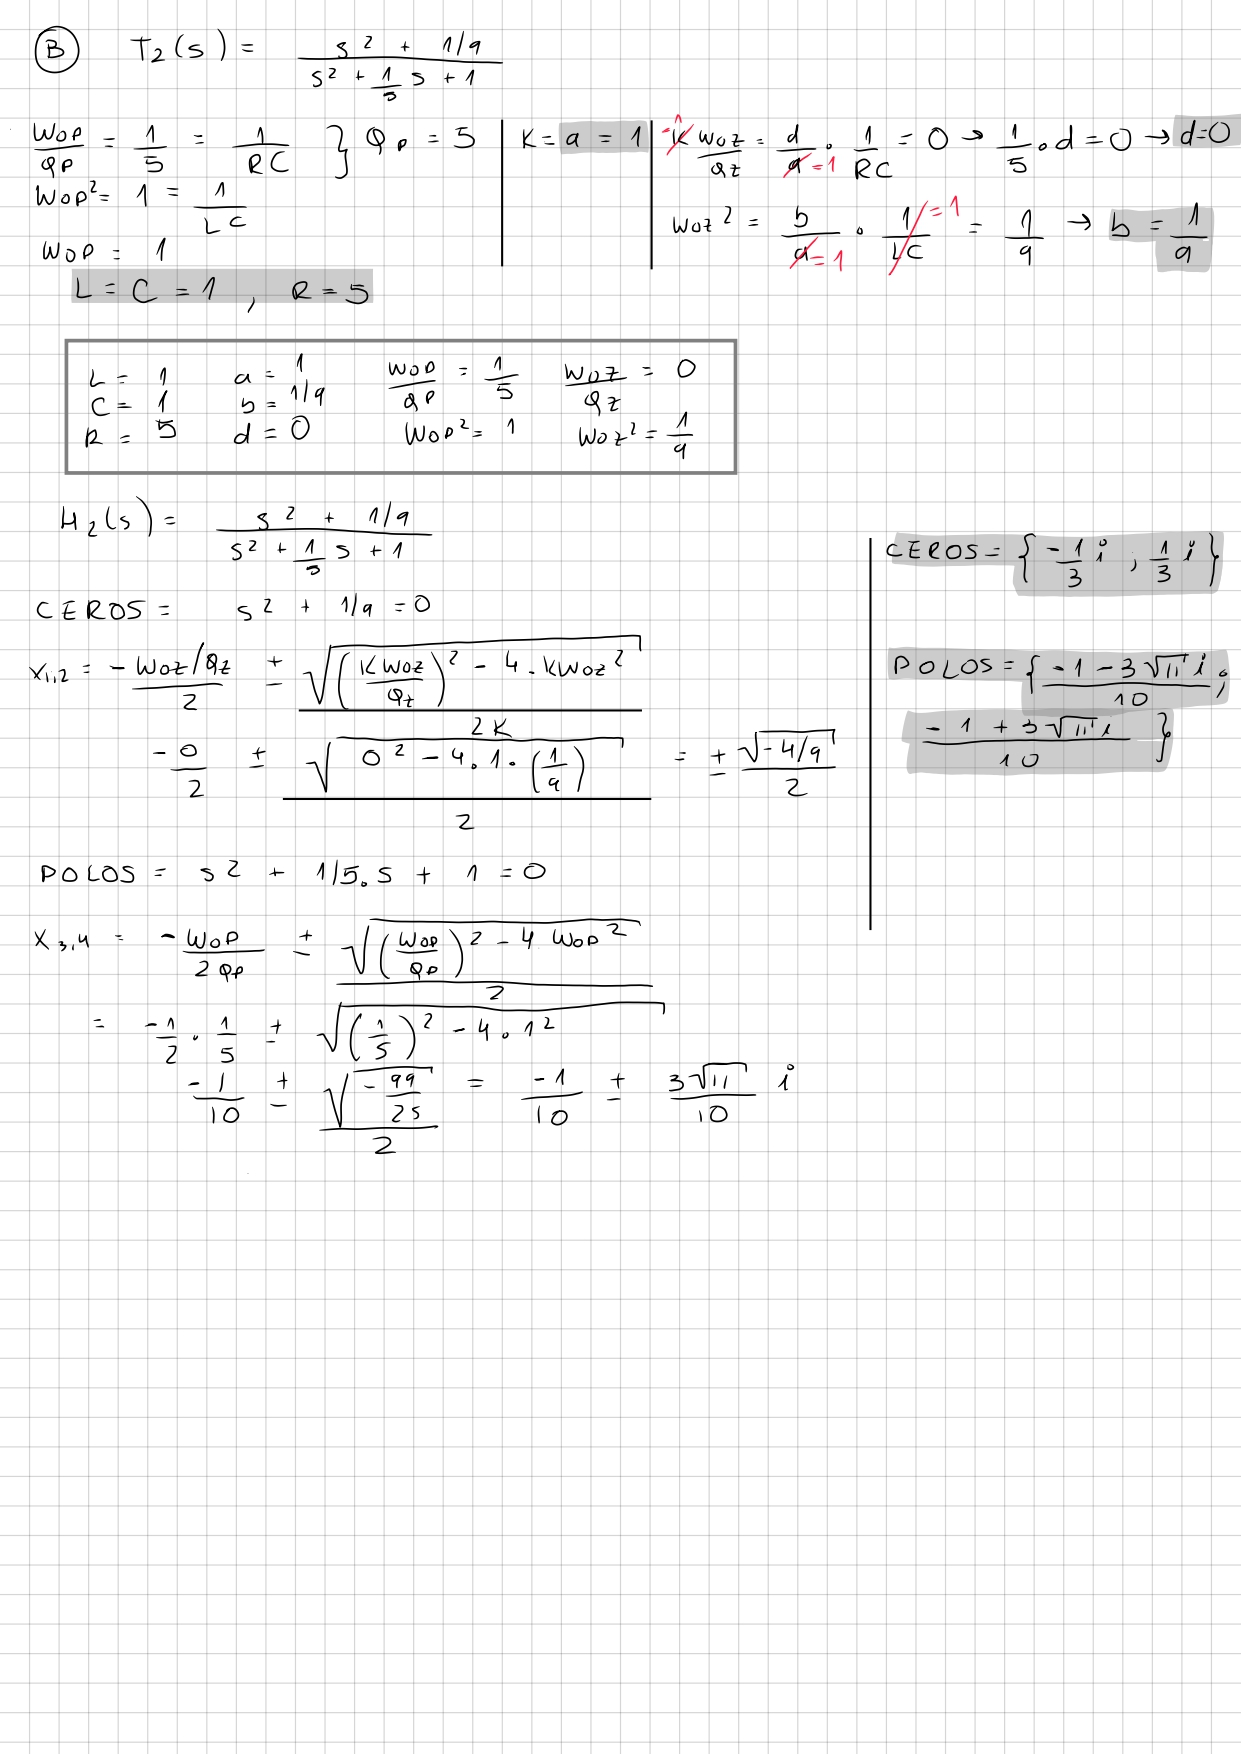

In [23]:
from IPython.display import Image, display 
display(Image(filename='C:/Users/magui/APS/TS SEGUNDAAAA/TS 6/H2(s).jpg'))

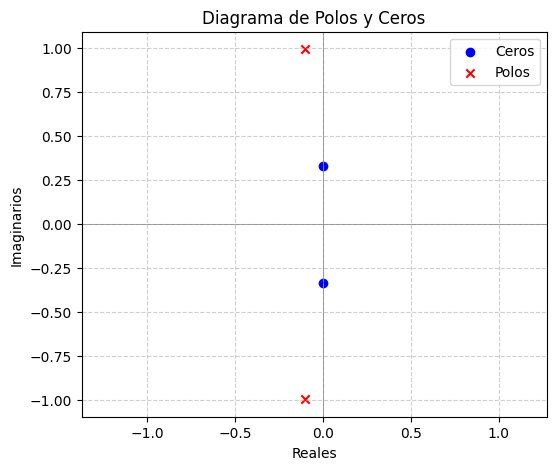

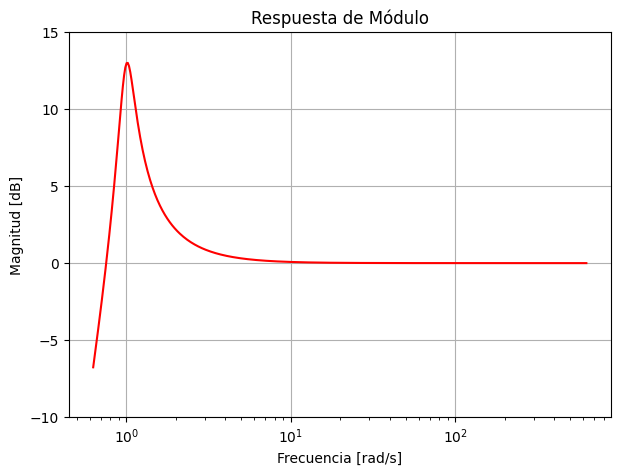

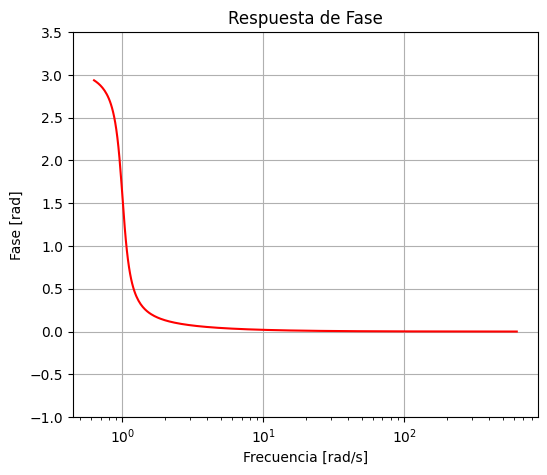

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

zdiv = 0 
pdiv=1/5
W0zcuad = 1/9
W0pcuad = 1 
numerador = [1, zdiv, W0zcuad]  # Numerador 
denominador = [1, pdiv, W0pcuad]  # Denominador 

# función transferencia
sistema = signal.TransferFunction(numerador, denominador)

#%% GRAFICO CEROS Y POLOS
zeros, poles = sistema.zeros, sistema.poles

# Graficar
plt.figure(figsize=(6, 5))
plt.scatter(np.real(zeros), np.imag(zeros), marker='o', color='blue', label='Ceros')
plt.scatter(np.real(poles), np.imag(poles), marker='x', color='red', label='Polos')
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel('Reales')
plt.ylabel('Imaginarios')
plt.title('Diagrama de Polos y Ceros')
plt.legend()
plt.axis('equal')
plt.show()


#%% GRAFICO RTA DE MODULO 
f = np.logspace(-1, 2, 400)  
w = 2 * np.pi * f
w, mag, fase_grados = signal.bode(sistema, w)
fase_radianes = np.deg2rad(fase_grados)

# Grafico rta de módulo 
plt.figure(figsize=(7, 5))
plt.ylim(-10,15)
plt.semilogx(w, mag, "r")  
plt.title("Respuesta de Módulo")
plt.xlabel("Frecuencia [rad/s]")
plt.ylabel("Magnitud [dB]")
plt.grid(True)
plt.show()

#%% GRAFICO RTA DE FASE
plt.figure(figsize=(6, 5))
plt.ylim(-1 , 3.5)  
plt.semilogx(w, fase_radianes, "r")
plt.title("Respuesta de Fase")
plt.xlabel("Frecuencia [rad/s]")
plt.ylabel("Fase [rad]")
plt.grid(True)
plt.show()

La funcion $H_2(s) = \frac{s^2+\frac{1}{9}}{s^2+\frac{1}{5}+1}$ muestra graficos caracteristicos de un filtro pasa banda invertido. Sus ceros generan una atenuacion para bajas frecuencias. Su respuesta de moduo, comienza en valores bajos para la frecuencia tendiendo a cero, alcanza su maximo para $W=1rad/s$ y luego decrece suavemente para altas frecuencias, mostrando una respuesta aistotica plana. La fase, parte desde su maximo y desciende hasta cero, donde se estabiliza para el aumento de las frecuencias.

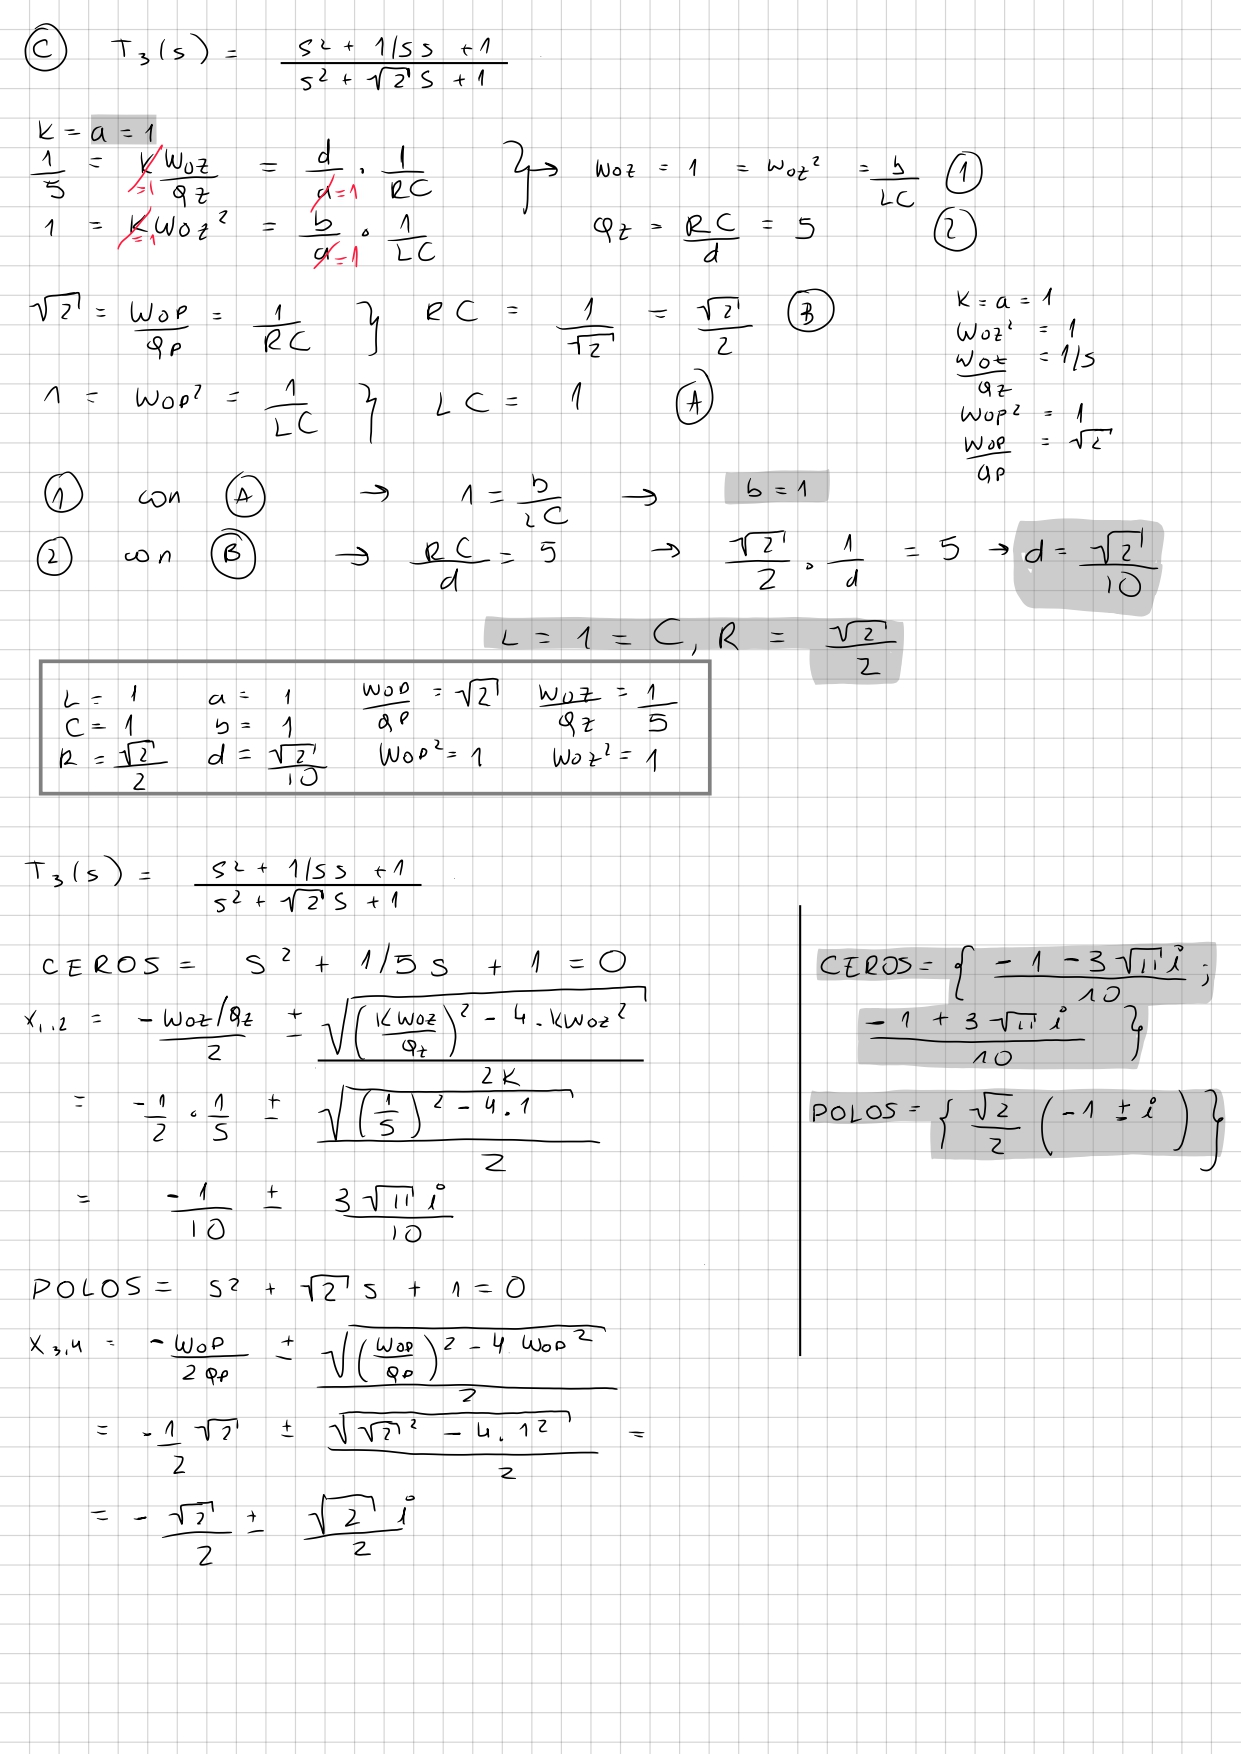

In [24]:
from IPython.display import Image, display 
display(Image(filename='C:/Users/magui/APS/TS SEGUNDAAAA/TS 6/H3(s).jpg'))

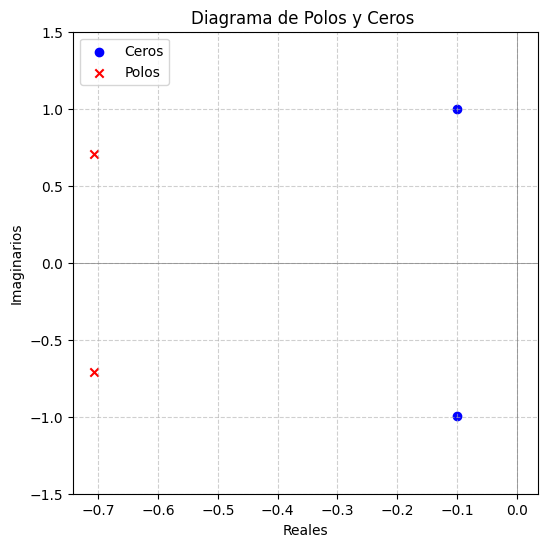

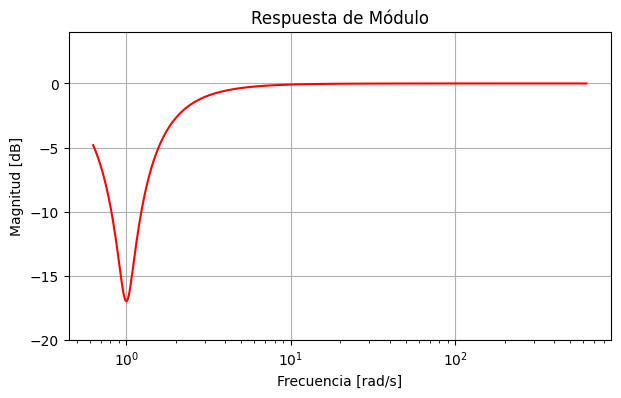

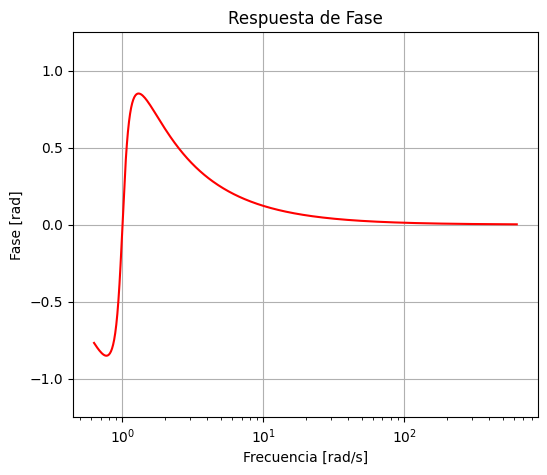

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

zdiv = 1/5
pdiv=np.sqrt(2)
W0zcuad = 1
W0pcuad = 1 
numerador = [1, zdiv, W0zcuad]  # Numerador 
denominador = [1, pdiv, W0pcuad]  # Denominador 

# función transferencia
sistema = signal.TransferFunction(numerador, denominador)

#%% GRAFICO CEROS Y POLOS
zeros, poles = sistema.zeros, sistema.poles

# Graficar
plt.figure(figsize=(6, 6))
plt.ylim(-1.5, 1.5)
plt.scatter(np.real(zeros), np.imag(zeros), marker='o', color='blue', label='Ceros')
plt.scatter(np.real(poles), np.imag(poles), marker='x', color='red', label='Polos')
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel('Reales')
plt.ylabel('Imaginarios')
plt.title('Diagrama de Polos y Ceros ')
plt.legend()
plt.show()

#%% GRAFICO RTA DE MODULO 
f = np.logspace(-1, 2, 400)  
w = 2 * np.pi * f
w, mag, fase_grados = signal.bode(sistema, w)
fase_radianes = np.deg2rad(fase_grados)

# Grafico rta de módulo 
plt.figure(figsize=(7, 4))
plt.ylim(-20,4)
plt.semilogx(w, mag, "r")  
plt.title("Respuesta de Módulo")
plt.xlabel("Frecuencia [rad/s]")
plt.ylabel("Magnitud [dB]")
plt.grid(True)
plt.show()

#%%GRAFICO RTA DE FASE 
plt.figure(figsize=(6, 5))
plt.ylim(-1.25 , 1.25)  
plt.semilogx(w, fase_radianes, "r")
plt.title("Respuesta de Fase")
plt.xlabel("Frecuencia [rad/s]")
plt.ylabel("Fase [rad]")
plt.grid(True)
plt.show()
plt.show()

La funcion $H_3(s)$ presenta una repuesta con caracteristicas parecidas a la de un filtro pasa banda ($H_1(s)$), pero muestra pendientes mas suavizadas y un pico de ganancia menos pronunciado. Por los valores de sus ceros, que no son puramente imaginarios, no es un filtro notch. Igualmente, respeta la forma representativa de estos, con una respuesta de modulo que alcanza su minimo al rededor de la frecuencia $W=1rad/s$, y tiene valores cercanos al cero, para frecuencias menore y cuando estas tienden a cero. La respuesta de fase, mantiene esta similitud con la de un filtro pasa banda, pero menos pronunciado y alcanzando valores, en modulo, menores. 

Se logro calcular y analizar la funcion transferencia a partir de un circuito, identificando sus parametros caracteristicos, polo y ceros. Luego, desde funciones concretas aplicadas al modelo ya estuadiado, y funciones en codigo, se grafico y analizo su respuesta en frecuencia, para determinar su comportamiento y clasificarlo segun el tipo de filtro.